In [4]:
#import the packages
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [5]:
#reading the data
df=pd.read_csv('winequality_red.csv')
print(df)

   Fixed Acidity  Volatile Acidity  Citric Acidity  Residual sugar  Chlorides  \
0            7.4              0.70            0.00             1.9      0.076   
1            7.8              0.88            0.00             2.6      0.098   
2            7.8              0.76            0.04             2.3      0.092   
3           11.2              0.28            0.56             1.9      0.075   
4            7.4              0.70            0.00             1.9      0.076   

   Free sulfur dioxide  Total sulfur dioxide  Density    ph  Sulphate  \
0                   11                    34   0.9978  3.51      0.56   
1                   25                    67   0.9968  3.20      0.68   
2                   15                    54   0.9970  3.25      0.65   
3                   17                    60   0.9980  3.16      0.58   
4                   11                    34   0.9978  3.51      0.56   

   Alcohol  Quality  
0      9.4        5  
1      9.8        5  
2      9

In [6]:
%cd

C:\Users\user


In [7]:
#shape of datasets
df.shape

(5, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         5 non-null      float64
 1   Volatile Acidity      5 non-null      float64
 2   Citric Acidity        5 non-null      float64
 3   Residual sugar        5 non-null      float64
 4   Chlorides             5 non-null      float64
 5   Free sulfur dioxide   5 non-null      int64  
 6   Total sulfur dioxide  5 non-null      int64  
 7   Density               5 non-null      float64
 8   ph                    5 non-null      float64
 9   Sulphate              5 non-null      float64
 10  Alcohol               5 non-null      float64
 11  Quality               5 non-null      int64  
dtypes: float64(9), int64(3)
memory usage: 608.0 bytes


In [9]:
df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acidity,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,ph,Sulphate,Alcohol,Quality
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,8.320000,0.664000,0.120000,2.120000,0.083400,15.800000,49.800000,0.99748,3.326000,0.606000,9.640000,5.200000
std,1.622344,0.226892,0.246577,0.319374,0.010807,5.761944,15.139353,0.00054,0.170968,0.055498,0.219089,0.447214
min,7.400000,0.280000,0.000000,1.900000,0.075000,11.000000,34.000000,0.99680,3.160000,0.560000,9.400000,5.000000
25%,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.99700,3.200000,0.560000,9.400000,5.000000
50%,7.800000,0.700000,0.000000,1.900000,0.076000,15.000000,54.000000,0.99780,3.250000,0.580000,9.800000,5.000000
75%,7.800000,0.760000,0.040000,2.300000,0.092000,17.000000,60.000000,0.99780,3.510000,0.650000,9.800000,5.000000
max,11.200000,0.880000,0.560000,2.600000,0.098000,25.000000,67.000000,0.99800,3.510000,0.680000,9.800000,6.000000


In [10]:
df.isnull().sum()

Fixed Acidity           0
Volatile Acidity        0
Citric Acidity          0
Residual sugar          0
Chlorides               0
Free sulfur dioxide     0
Total sulfur dioxide    0
Density                 0
ph                      0
Sulphate                0
Alcohol                 0
Quality                 0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


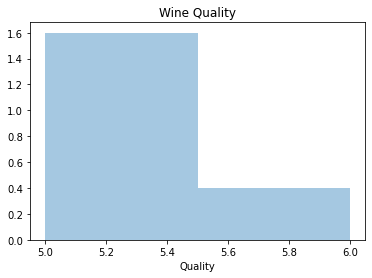

In [11]:
sn.distplot(df["Quality"])
plt.title("Wine Quality")
plt.show()

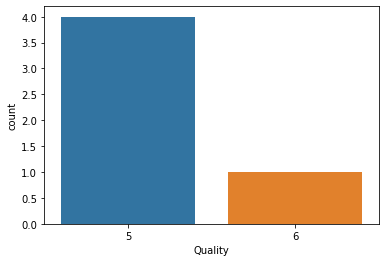

In [12]:
sn.countplot(x='Quality',data=df)
plt.show()

In [13]:
df['Alcohol'].describe()

count    5.000000
mean     9.640000
std      0.219089
min      9.400000
25%      9.400000
50%      9.800000
75%      9.800000
max      9.800000
Name: Alcohol, dtype: float64

In [14]:
df['Sulphate'].describe()

count    5.000000
mean     0.606000
std      0.055498
min      0.560000
25%      0.560000
50%      0.580000
75%      0.650000
max      0.680000
Name: Sulphate, dtype: float64

In [15]:
df['ph'].describe()

count    5.000000
mean     3.326000
std      0.170968
min      3.160000
25%      3.200000
50%      3.250000
75%      3.510000
max      3.510000
Name: ph, dtype: float64

In [16]:
df['Density'].describe()

count    5.00000
mean     0.99748
std      0.00054
min      0.99680
25%      0.99700
50%      0.99780
75%      0.99780
max      0.99800
Name: Density, dtype: float64

In [17]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Fixed Acidity            0.4000
Volatile Acidity         0.0600
Citric Acidity           0.0400
Residual sugar           0.4000
Chlorides                0.0160
Free sulfur dioxide      6.0000
Total sulfur dioxide    26.0000
Density                  0.0008
ph                       0.3100
Sulphate                 0.0900
Alcohol                  0.4000
Quality                  0.0000
dtype: float64


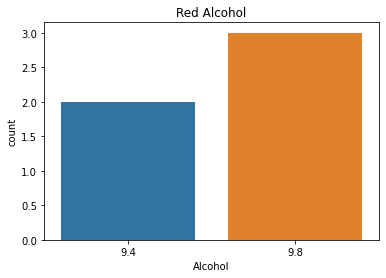

In [18]:
sn.countplot(df["Alcohol"])
plt.title("Red Alcohol")
plt.show()

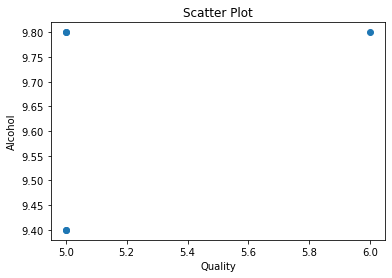

In [19]:
plt.scatter(df["Quality"],df["Alcohol"])
plt.title("Scatter Plot")
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.show()

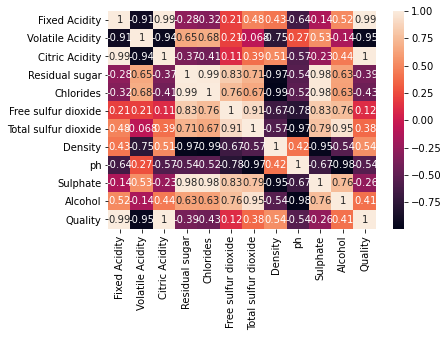

In [20]:
corr=df.corr()
sn.heatmap(corr,annot=True)
plt.show()

In [21]:
df.drop("Chlorides",axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         5 non-null      float64
 1   Volatile Acidity      5 non-null      float64
 2   Citric Acidity        5 non-null      float64
 3   Residual sugar        5 non-null      float64
 4   Free sulfur dioxide   5 non-null      int64  
 5   Total sulfur dioxide  5 non-null      int64  
 6   Density               5 non-null      float64
 7   ph                    5 non-null      float64
 8   Sulphate              5 non-null      float64
 9   Alcohol               5 non-null      float64
 10  Quality               5 non-null      int64  
dtypes: float64(8), int64(3)
memory usage: 568.0 bytes


In [23]:
correlations=df_out.corr()['quality'].drop('quality')
print(correl)

NameError: name 'df_out' is not defined

In [24]:
mpgds=sn.load_dataset('mpg')
mpgds

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


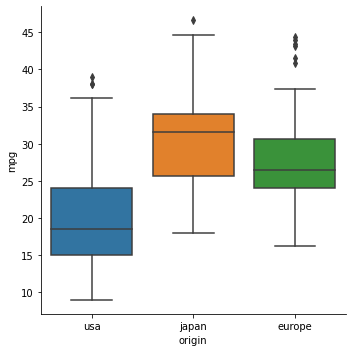

In [25]:
sn.catplot(data=mpgds,x='origin',y='mpg',kind='box')
plt.show()

In [26]:
#sn.boxplot(data=df[["Quality","Alcohol"]],orient="h",pattern="set2")
#plt.title("outliers detection using Boxplot")
#plt.show()
from scipy.stats import zscore
import numpy as np 
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [27]:
print("original shape=",df.shape,"\n New Shape=",new_df.shape)

original shape= (5, 11) 
 New Shape= (5, 11)


In [28]:
new_df.skew()

Fixed Acidity           2.151564
Volatile Acidity       -1.625492
Citric Acidity          2.209200
Residual sugar          1.080544
Free sulfur dioxide     1.216959
Total sulfur dioxide   -0.199917
Density                -0.577990
ph                      0.454017
Sulphate                0.678043
Alcohol                -0.608581
Quality                 2.236068
dtype: float64

In [29]:
x=new_df.drop("Quality",axis=1)
y=new_df["Quality"]

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
best_rstate=0
accu=0
for i in range(199,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
        
    print(f"Best accuracy{accu*100}found on random_state{best_rstate}")

Best accuracy0found on random_state0


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=2).mean()
print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference= {(r2score*100)-(cvscore*100)}")

Accuracy=0.0,cross_val_score=nan & difference= nan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [35]:
parameters={"max_inter":[500,700,900,1100,1200,1300,1400,1500],
           "alpha":[0.0001,0.001,0.001,0.1,1,10,100],
           "penalty":["elasticnet","11","12"]}

In [36]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(SGDRegressor(),parameters, cv=3,scoring='r2')
GCV.fit(x_train,y_train)
Gcv.best_estimator_
GCV_pred=GCV.best_estimator_predict(x_test)
print("Final accuracy:",r2_score(y_test,GCV_pred)*100)

NameError: name 'SGDRegressor' is not defined

In [37]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=3).mean()
print(f"Accuracy={r2score*100}, Cross_val_sccore= {cvscore*100} & difference={(r2score*100)-(cvscore*100)}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Accuracy=0.0, Cross_val_sccore= nan & difference=nan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [38]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x train, v train)

SyntaxError: invalid syntax (<ipython-input-38-8b0347e8a8b1>, line 3)